# Analysis 3
## Objectives
- for yelp reviews, find how number of words and stars influence votes made to that review
## Steps
- use review.json in data set
- for reviews, use dataframe to record stars, number of words and different votes
- generate comprehensive plots

In [10]:
%matplotlib inline

In [11]:
import glob
import os
import json
from pathlib import Path
from pandas import Series, DataFrame
import pandas as pd

In [12]:
p = Path(os.getcwd())
review_path = str(p.parent) + '/data/yelp_training_set/yelp_training_set_review.json'

In [13]:
df = pd.DataFrame(columns=['words', 'stars', 'funny', 'useful', 'cool'])
with open(review_path, 'r', encoding='utf-8', errors='ignore') as f:
    for line in f:
        data = json.loads(line)
        votes = data['votes']
        f = votes['funny']
        u = votes['useful']
        c = votes['cool']
        w = len(data['text'])
        s = data['stars']
        if f == 0 and u == 0 and c == 0:
            continue
        df = df.append(Series({'words': w, 'stars': s, 'funny': f, 'useful': u, 'cool': c}), ignore_index=True)
df.head(6)

,words,stars,funny,useful,cool
0,889.0,5.0,0.0,5.0,2.0
1,76.0,4.0,0.0,1.0,0.0
2,419.0,5.0,0.0,2.0,1.0
3,2094.0,4.0,1.0,3.0,4.0
4,1565.0,5.0,4.0,7.0,7.0
5,274.0,4.0,0.0,1.0,0.0


In [14]:
df['all_votes'] = df['funny'] + df['useful'] + df['cool']
df.head(6)

,words,stars,funny,useful,cool,all_votes
0,889.0,5.0,0.0,5.0,2.0,7.0
1,76.0,4.0,0.0,1.0,0.0,1.0
2,419.0,5.0,0.0,2.0,1.0,3.0
3,2094.0,4.0,1.0,3.0,4.0,8.0
4,1565.0,5.0,4.0,7.0,7.0,18.0
5,274.0,4.0,0.0,1.0,0.0,1.0


In [15]:
# use this if seaborn cannot be imported
# %%bash
# pip install seaborn

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

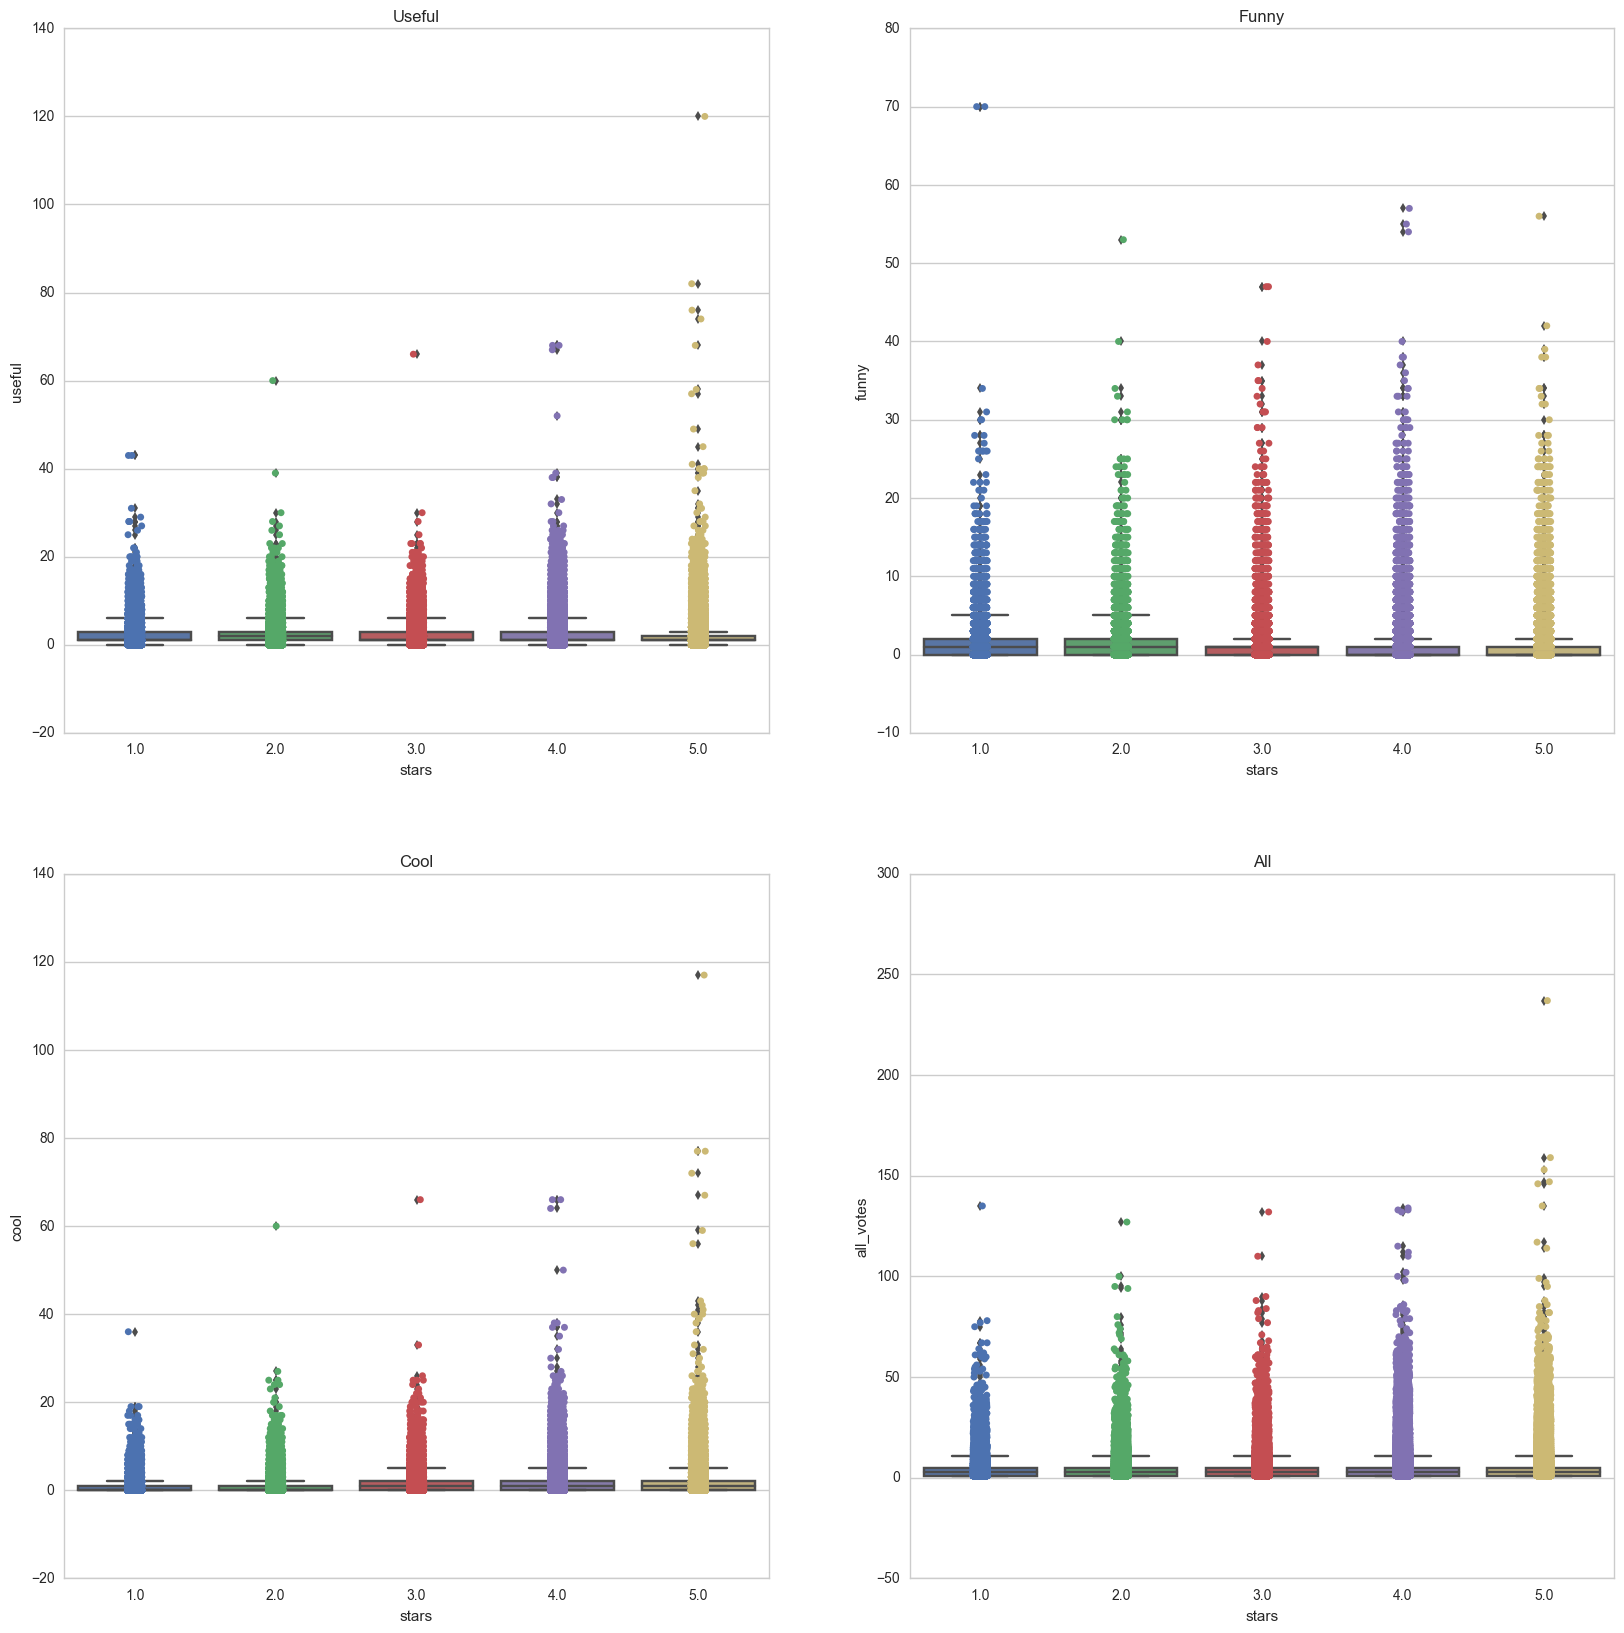

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(20,20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# ax1 = fig.add_subplot(10, 10, 1)
axes[0,0].set_title('Useful')
sns.boxplot(x="stars", y="useful", data=df, ax = axes[0,0])
sns.stripplot(x="stars", y="useful", data=df, jitter=0.05, ax = axes[0,0])

# ax2 = fig.add_subplot(10, 10, 2)
axes[0,1].set_title('Funny')
sns.boxplot(x="stars", y="funny", data=df, ax = axes[0,1])
sns.stripplot(x="stars", y="funny", data=df, jitter=0.05, ax = axes[0,1])

# ax3 = fig.add_subplot(10, 10, 3)
axes[1,0].set_title('Cool')
sns.boxplot(x="stars", y="cool", data=df, ax = axes[1,0])
sns.stripplot(x="stars", y="cool", data=df, jitter=0.05, ax = axes[1,0])

# ax4 = fig.add_subplot(10, 10, 4)
axes[1,1].set_title('All')
sns.boxplot(x="stars", y="all_votes", data=df, ax = axes[1,1])
sns.stripplot(x="stars", y="all_votes", data=df, jitter=0.05, ax = axes[1,1])

plt.savefig('ana_3/stars_and_votes.png')

['seaborn-bright', 'fivethirtyeight', 'seaborn-ticks', 'seaborn-pastel', 'seaborn-paper', 'seaborn-colorblind', 'grayscale', 'seaborn-darkgrid', 'classic', 'dark_background', 'seaborn-muted', 'seaborn-poster', 'seaborn-white', 'bmh', 'seaborn-talk', 'seaborn-notebook', 'seaborn-dark', 'seaborn-whitegrid', 'ggplot', 'seaborn-dark-palette', 'seaborn-deep']


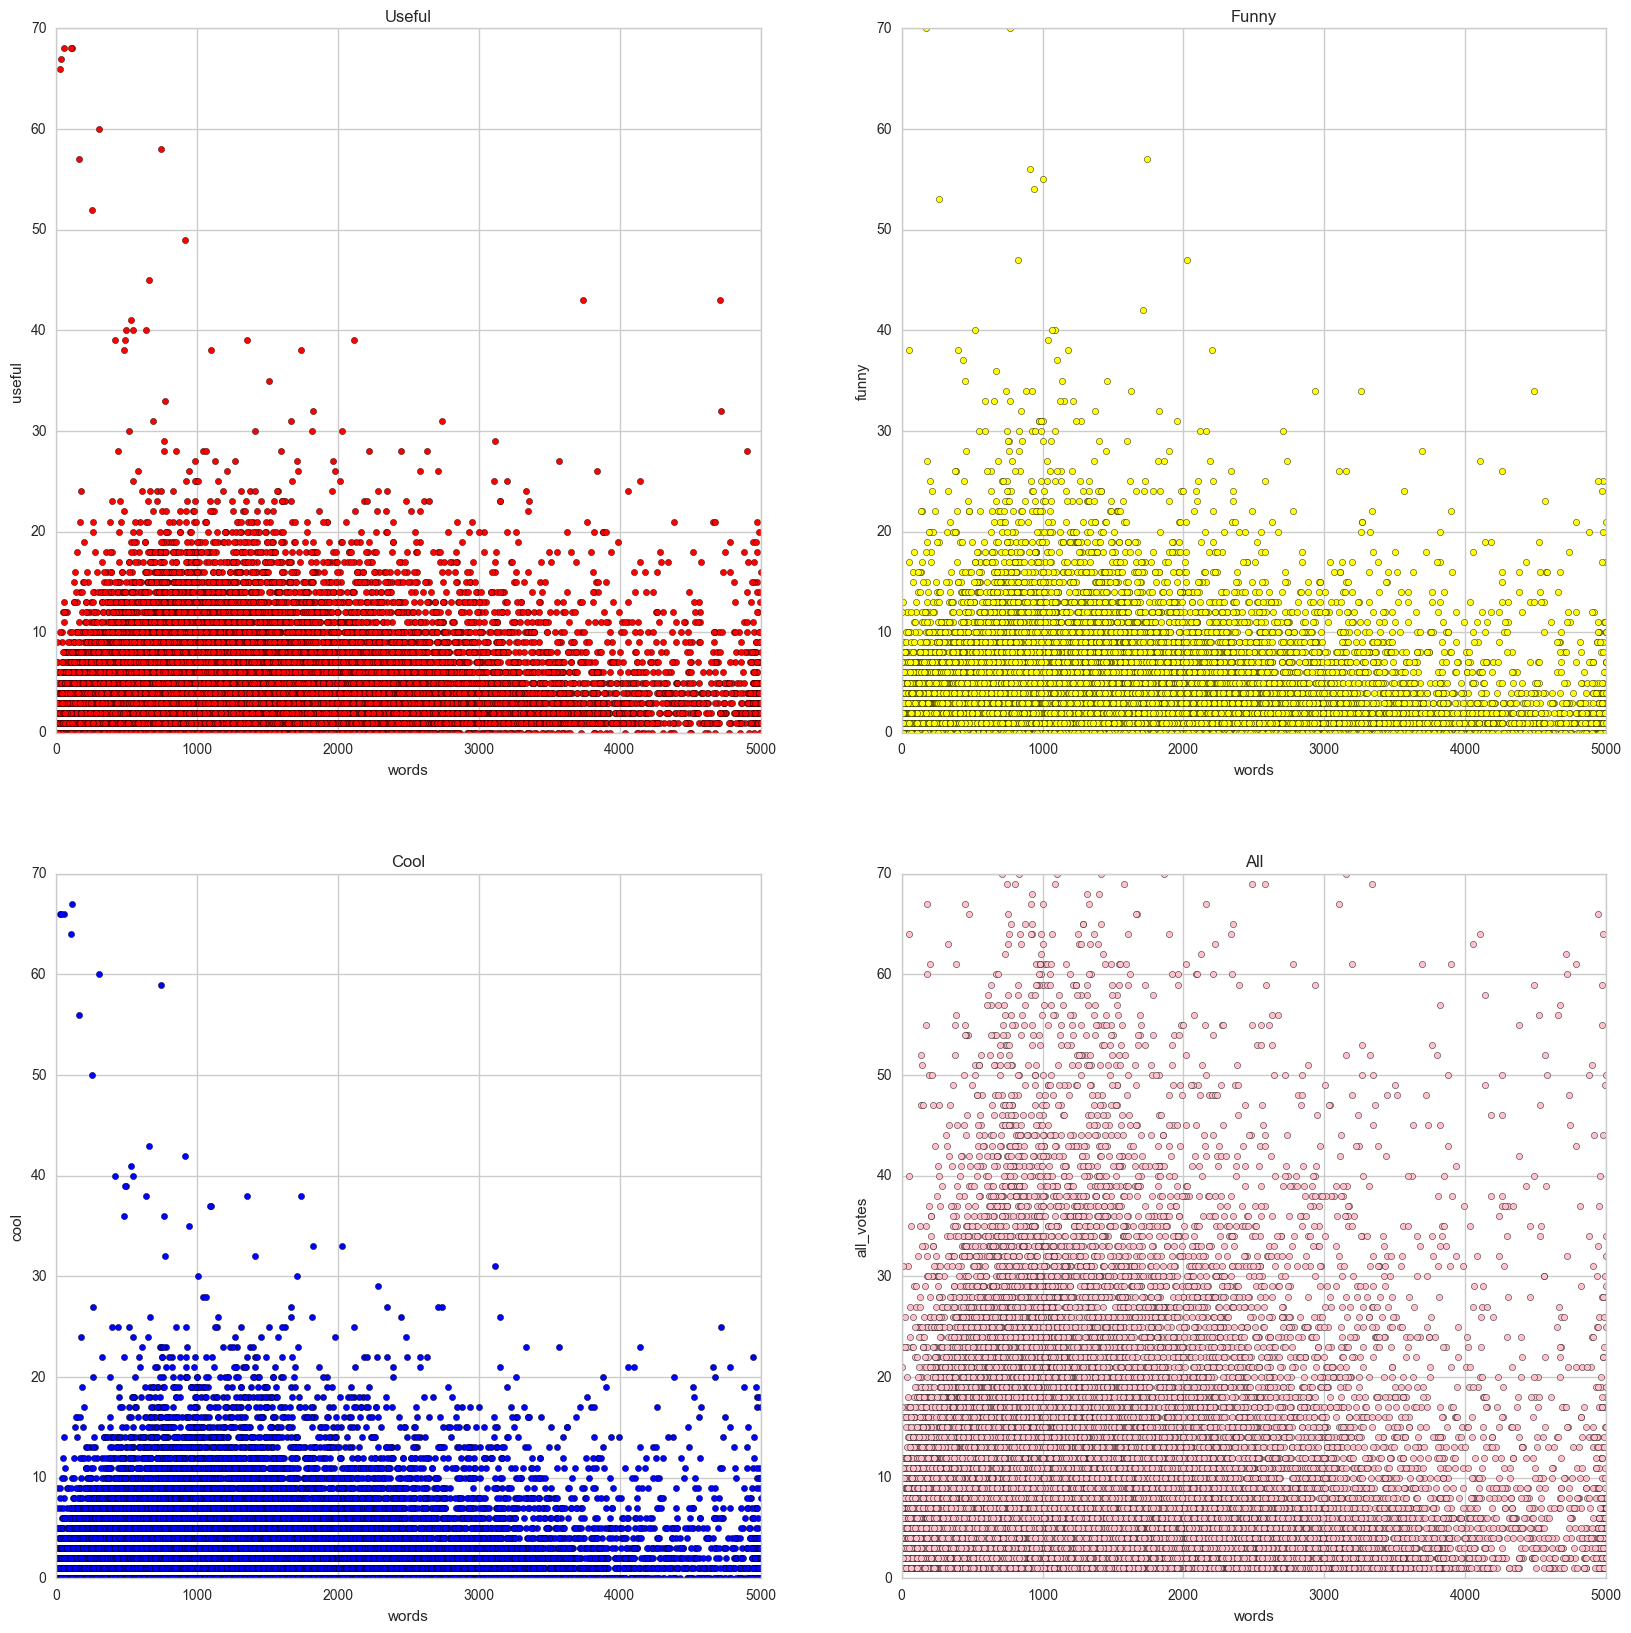

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(20,20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
print(matplotlib.style.available)
matplotlib.style.use('seaborn-whitegrid')
df.plot(x='words', y='useful', kind = 'scatter', xlim = [0, 5000], ylim = [0, 70], color='Red', ax = axes[0,0], title = 'Useful')
df.plot(x='words', y='funny', kind = 'scatter', xlim = [0, 5000], ylim = [0, 70], color='Yellow', ax = axes[0,1], title = 'Funny')
df.plot(x='words', y='cool', kind = 'scatter', xlim = [0, 5000], ylim = [0, 70], color='Blue', ax = axes[1,0], title = 'Cool')
df.plot(x='words', y='all_votes', kind = 'scatter', xlim = [0, 5000], ylim = [0, 70], color='Pink', ax = axes[1,1], title = 'All')
plt.savefig('ana_3/words_and_votes.png')